<a href="https://colab.research.google.com/github/aiswarya-1422/ictak/blob/main/Assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('heart_disease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
missing_values = data.isnull().sum()

In [ ]:
data_types = data.dtypes

In [ ]:
summary = data.describe()

In [ ]:
#outlier detection
outlier_count = {}
for col in data.select_dtypes(include='number').columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count[col]= outliers.shape[0]

In [ ]:
print('Missing Values:')
print(missing_values)
print('\nData Types:')
print(data_types)
print('\nSummary Statistics:')
print(summary)
print('\nOutlier Count:')
print(outlier_count)

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Summary Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      

TASK 2

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [ ]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [ ]:
data[num_cols] = data[num_cols].fillna(data[num_cols].median())
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [ ]:
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower, upper)

In [ ]:
multi_cat_cols = ['cp', 'restecg', 'thal']
data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)
data['sex'] = data['sex'].apply(lambda x: 1 if x in [1, 'male', 'M'] else 0)
data['fbs'] = data['fbs'].apply(lambda x: 1 if x == 1 else 0)


In [ ]:
scale_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
scaler = StandardScaler()
data[scale_cols] = scaler.fit_transform(data[scale_cols])

In [ ]:
print('Preprocessed Data:')
print(data.head())

Preprocessed Data:
   age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  slope   ca  \
0   52    1 -0.378869 -0.691104    0  0.824084      0 -0.054537      2  2.0   
1   53    1  0.528894 -0.879693    0  0.255654      1  1.785457      0  0.0   
2   70    1  0.831481 -1.487368    0 -1.056105      1  1.347363      0  0.0   
3   61    1  1.013034 -0.879693    0  0.518006      0 -0.930725      2  1.0   
4   62    0  0.407859  1.027150    0 -1.886886      0  0.734031      1  2.5   

   target   cp_1   cp_2   cp_3  restecg_1  restecg_2  thal_1.0  thal_2.0  \
0       0  False  False  False       True      False     False     False   
1       0  False  False  False      False      False     False     False   
2       0  False  False  False       True      False     False     False   
3       0  False  False  False       True      False     False     False   
4       0  False  False  False       True      False     False      True   

   thal_3.0  
0      True  
1      True  
2      

TASK 3

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X = data.drop(columns=['chol'])
y = data['chol']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Regression data split complete.")


Regression data split complete.


In [ ]:

X_clf = data.drop(columns=['target'])
y_clf = data['target']
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42)

print(" Classification data split complete.")


 Classification data split complete.


TASK 4

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report


In [ ]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))



Linear Regression:
R² Score: 0.05433216230343252
MSE: 1.0046563503007715


In [ ]:
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svr = svm_reg.predict(X_test)
print("\n Support Vector Regressor:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))



 Support Vector Regressor:
R² Score: 0.011528313370756105
MSE: 1.0501302016186658


In [ ]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("\n Random Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))



 Random Forest Regressor:
R² Score: 0.9310291676030923
MSE: 0.07327306903221228


In [ ]:

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf, y_train_clf)
y_pred_knn = knn_clf.predict(X_test_clf)
print("\n K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_knn))
print(classification_report(y_test_clf, y_pred_knn))
acc_knn = accuracy_score(y_test_clf, y_pred_knn)
prec_knn = precision_score(y_test_clf, y_pred_knn)
rec_knn = recall_score(y_test_clf, y_pred_knn)
f1_knn = f1_score(y_test_clf, y_pred_knn)



 K-Nearest Neighbors:
Accuracy: 0.8341463414634146
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       102
           1       0.88      0.78      0.82       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [ ]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_clf, y_train_clf)
y_pred_log = log_clf.predict(X_test_clf)
print("\n Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_log))
print(classification_report(y_test_clf, y_pred_log))
acc_log = accuracy_score(y_test_clf, y_pred_log)
prec_log = precision_score(y_test_clf, y_pred_log)
rec_log = recall_score(y_test_clf, y_pred_log)
f1_log = f1_score(y_test_clf, y_pred_log)


 Logistic Regression:
Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       102
           1       0.78      0.92      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)
print("\n Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_rf_clf))
print(classification_report(y_test_clf, y_pred_rf_clf))
acc_rf = accuracy_score(y_test_clf, y_pred_rf_clf)
prec_rf = precision_score(y_test_clf, y_pred_rf_clf)
rec_rf = recall_score(y_test_clf, y_pred_rf_clf)
f1_rf = f1_score(y_test_clf, y_pred_rf_clf)



 Random Forest Classifier:
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:


mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Model Evaluation:")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R-squared (R²): {r2:.2f}")


Linear Regression Model Evaluation:
 Mean Absolute Error (MAE): 0.79
 Mean Squared Error (MSE): 1.00
 R-squared (R²): 0.05


In [ ]:
print("KNN Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test_clf, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test_clf, y_pred_knn):.2f}")
print(f"F1 Score: {f1_score(y_test_clf, y_pred_knn):.2f}")


KNN Classifier Evaluation:
Accuracy: 0.83
Precision: 0.88
Recall: 0.78
F1 Score: 0.82


In [ ]:
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_log):.2f}")
print(f"Precision: {precision_score(y_test_clf, y_pred_log):.2f}")
print(f"Recall: {recall_score(y_test_clf, y_pred_log):.2f}")
print(f"F1 Score: {f1_score(y_test_clf, y_pred_log):.2f}")


Logistic Regression Evaluation:
Accuracy: 0.83
Precision: 0.78
Recall: 0.92
F1 Score: 0.84


In [ ]:
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_rf_clf):.2f}")
print(f"Precision: {precision_score(y_test_clf, y_pred_rf_clf):.2f}")
print(f"Recall: {recall_score(y_test_clf, y_pred_rf_clf):.2f}")
print(f"F1 Score: {f1_score(y_test_clf, y_pred_rf_clf):.2f}")


Random Forest Classifier Evaluation:
Accuracy: 0.99
Precision: 1.00
Recall: 0.97
F1 Score: 0.99


In [ ]:

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR', 'Random Forest Regressor'],
    'MAE': [mae_lr, mae_svr, mae_rf],
    'MSE': [mse_lr, mse_svr, mse_rf],
    'R2 Score': [r2_lr, r2_svr, r2_rf]
})

classification_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest Classifier'],
    'Accuracy': [acc_log, acc_knn, acc_rf],
    'Precision': [prec_log, prec_knn, prec_rf],
    'Recall': [rec_log, rec_knn, rec_rf],
    'F1 Score': [f1_log, f1_knn, f1_rf]
})

print("Regression Summary:\n", regression_results)
print("\n Classification Summary:\n", classification_results)


Regression Summary:
                      Model       MAE       MSE  R2 Score
0        Linear Regression  0.793974  1.004656  0.054332
1                      SVR  0.817555  1.050130  0.011528
2  Random Forest Regressor  0.173332  0.073273  0.931029

 Classification Summary:
                       Model  Accuracy  Precision    Recall  F1 Score
0       Logistic Regression  0.829268   0.778689  0.922330  0.844444
1                       KNN  0.834146   0.879121  0.776699  0.824742
2  Random Forest Classifier  0.985366   1.000000  0.970874  0.985222


In [ ]:
import numpy as np

class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.theta = None

    def fit(self, X, y):

        X = np.c_[np.ones(X.shape[0]), X]
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.epochs):
            y_pred = X @ self.theta
            error = y_pred - y
            gradient = (1/m) * (X.T @ error)

            self.theta = self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X @ self.theta


In [ ]:


mod1 = CustomLinearRegression(lr=0.01, epochs=1000)
mod1.fit(X_train.values, y_train.values.ravel())
y_pred_custom = mod1.predict(X_test.values)

/tmp/ipython-input-1757667689.py:18: RuntimeWarning: overflow encountered in matmul
  gradient = (1/m) * (X.T @ error)
/tmp/ipython-input-1757667689.py:18: RuntimeWarning: invalid value encountered in matmul
  gradient = (1/m) * (X.T @ error)


from IPython.display import Image, display
display(Image(filename='"C:\Users\ASUS\Downloads\deivation.jpeg"'))  # Replace with your actual filename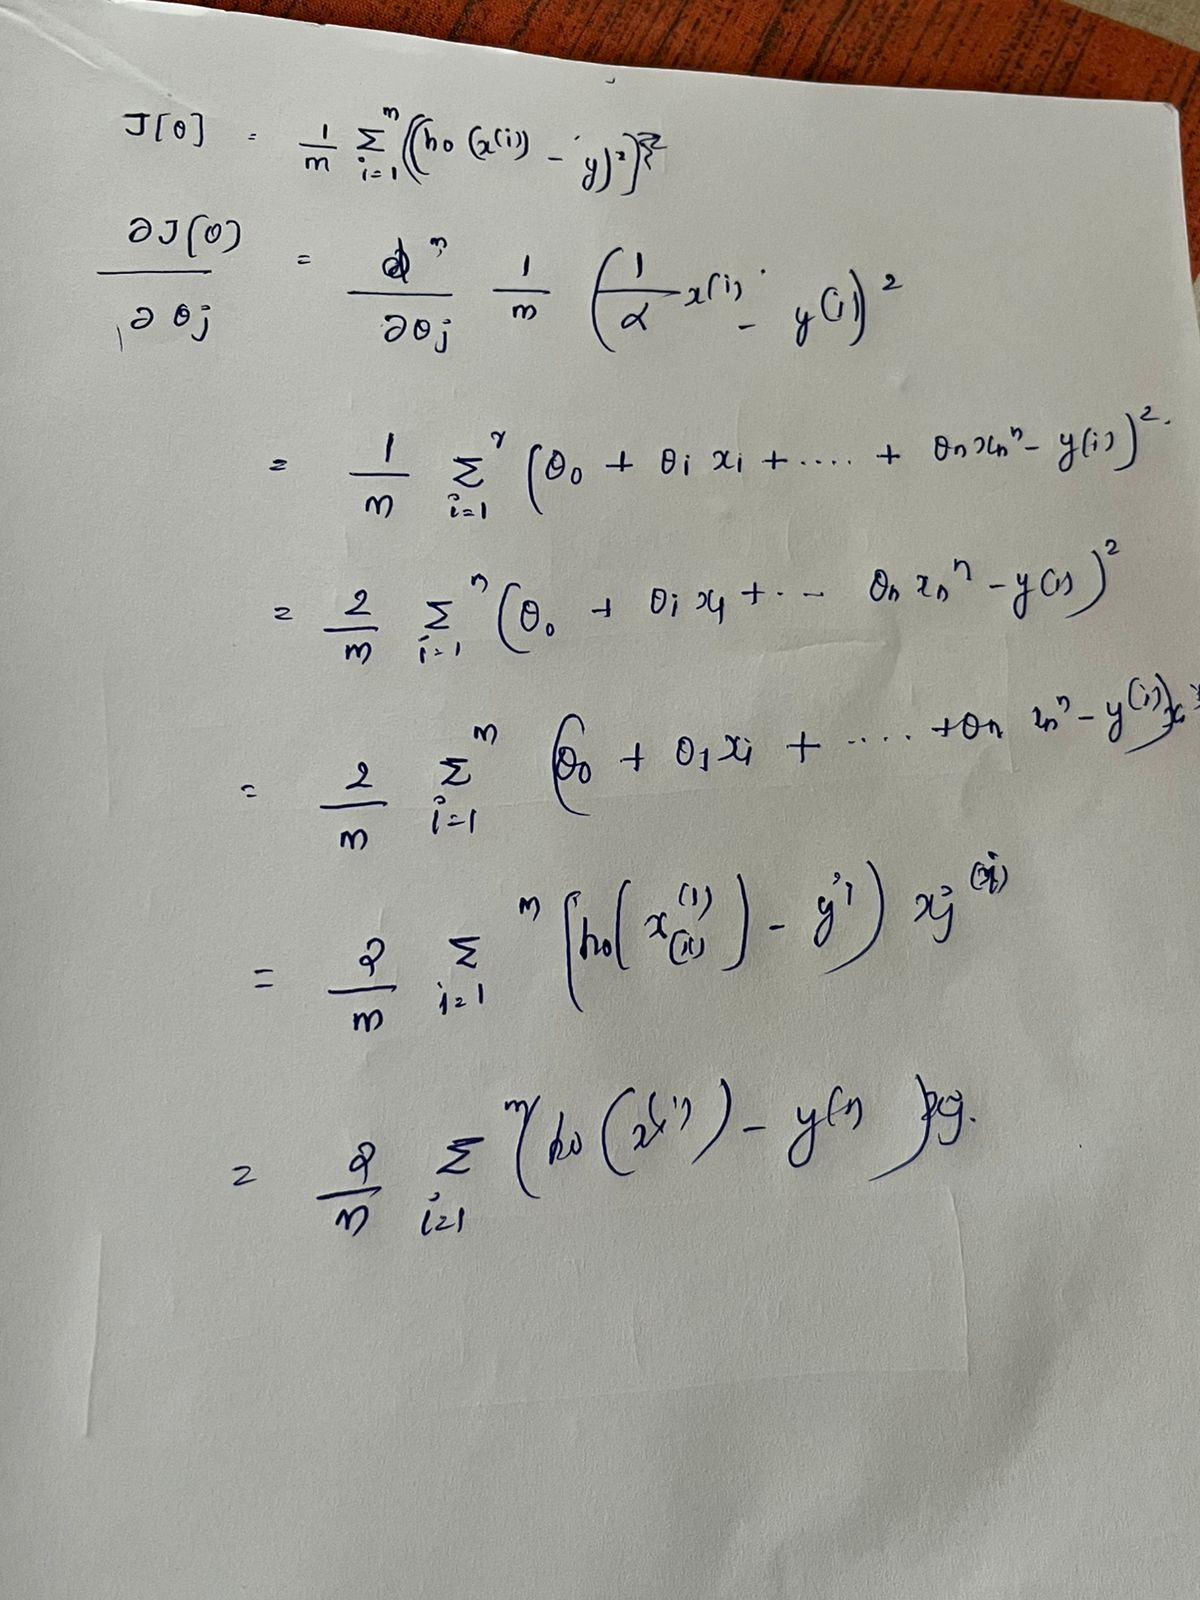